In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json

In [3]:
businesses = []
with open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r") as json_file:
    for line in json_file:
        businesses += [json.loads(line)]

In [4]:
businessdf = pd.DataFrame(businesses)
businessdf.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business


In [7]:
categories = set()
for l in business_df.categories:
    categories.update(c for c in l)
categories = sorted(categories)

#make a column for each genre
for category in categories:
    businessdf[category] = [category in clst for clst in business_df.categories]

businessdf.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Airlines,Airport Lounges,Airport Shuttles,Airports,Allergists,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Anesthesiologists,Animal Shelters,Antiques,Apartments,Appliances,Appliances & Repair,Aquarium Services,Aquariums,Arabian,Arcades,Archery,Architects,Argentine,Art Classes,Art Galleries,Art Schools,...,Turkish,Tutoring Centers,Ukrainian,Uniforms,University Housing,Urgent Care,Urologists,Used Bookstore,"Used, Vintage & Consignment",Utilities,Uzbek,Vacation Rental Agents,Vacation Rentals,Valet Services,Vape Shops,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Video/Film Production,Videographers,Videos & Video Game Rental,Vietnamese,Vinyl Records,Vocational & Technical School,Walk-in Clinics,Walking Tours,Watch Repair,Watches,Water Delivery,Waxing,Web Design,Wedding Planning,Weight Loss Centers,Wheel & Rim Repair,Wholesale Stores,Wigs,Window Washing,Windows Installation,Windshield Installation & Repair,Wine Bars,Wine Tours,Wineries,Wok,Women's Clothing,Yelp Events,Yoga,Zoos
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,Fa

In [70]:
cdict = {}
for category in categories:
    cdict[category] = sum(businessdf[category])

In [115]:
top = sorted(cdict.items(), key=lambda x:x[1], reverse = True)[:25]
top = sorted(top, key = lambda x:x[1])

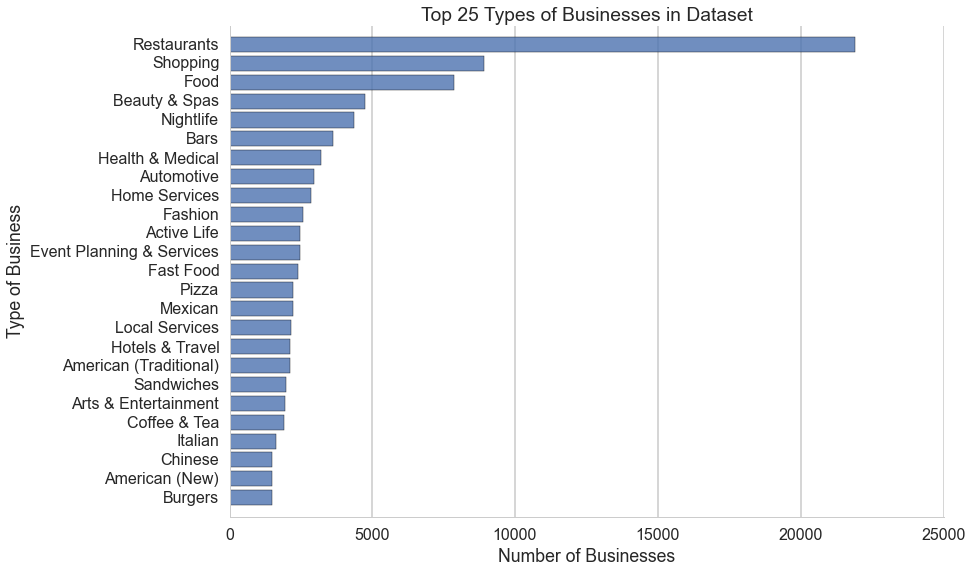

In [128]:
Y = np.arange(len(top))
plt.barh(Y, map(lambda x:x[1], top), align = 'center', alpha = 0.8)
plt.yticks(Y, map(lambda x:x[0], top))
plt.ylim(-1, 25)
plt.xlabel("Number of Businesses")
plt.ylabel("Type of Business")
plt.title("Top 25 Types of Businesses in Dataset")
plt.grid(b=None, axis='y')
sns.despine()

In [9]:
food_categories = []
for c in categories:
    if "Food" in c or "Restaurant" in c or "Bars" in c:
        food_categories.append(c)
food_categories

[u'Bars',
 u'Champagne Bars',
 u'Cocktail Bars',
 u'Comfort Food',
 u'Dive Bars',
 u'Do-It-Yourself Food',
 u'Ethnic Food',
 u'Fast Food',
 u'Food',
 u'Food Banks',
 u'Food Court',
 u'Food Delivery Services',
 u'Food Stands',
 u'Food Tours',
 u'Food Trucks',
 u'Gay Bars',
 u'Hookah Bars',
 u'Juice Bars & Smoothies',
 u'Live/Raw Food',
 u'Piano Bars',
 u'Pub Food',
 u'Restaurants',
 u'Soul Food',
 u'Specialty Food',
 u'Sports Bars',
 u'Sushi Bars',
 u'Swiss Food',
 u'Tapas Bars',
 u'Wine Bars']

In [138]:
businessdf.groupby('city').sum()

,latitude,longitude,open,review_count,stars,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Airlines,Airport Lounges,Airport Shuttles,Airports,Allergists,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Anesthesiologists,Animal Shelters,Antiques,Apartments,Appliances,Appliances & Repair,Aquarium Services,Aquariums,Arabian,Arcades,Archery,Architects,Argentine,Art Classes,Art Galleries,Art Schools,Art Supplies,Arts & Crafts,Arts & Entertainment,Asian Fusion,Auction Houses,Audiologist,Australian,Austrian,Auto Customization,Auto Detailing,...,Turkish,Tutoring Centers,Ukrainian,Uniforms,University Housing,Urgent Care,Urologists,Used Bookstore,"Used, Vintage & Consignment",Utilities,Uzbek,Vacation Rental Agents,Vacation Rentals,Valet Services,Vape Shops,Vegan,Vegetarian,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Video/Film Production,Videographers,Videos & Video Game Rental,Vietnamese,Vinyl Records,Vocational & Technical School,Walk-in Clinics,Walking Tours,Watch Repair,Watches,Water Delivery,Waxing,Web Design,Wedding Planning,Weight Loss Centers,Wheel & Rim Repair,Wholesale Stores,Wigs,Window Washing,Windows Installation,Windshield Installation & Repair,Wine Bars,Wine Tours,Wineries,Wok,Women's Clothing,Yelp Events,Yoga,Zoos
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1023 E Frye Rd,33.297848,-112.061276,1,3,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ahwatukee,333.248858,-1119.904519,9,319,35.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Allegheny,40.446294,-80.033770,1,4,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allentown,40.400804,-80.031782,1,17,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Anjou,273.596306,-441.393852,6,30,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Anthem,2810.445419,-9307.497109,76,1269,301.0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,2,0,0,0,2,0,0,0
Apache Junction,3876.523623,-12940.026901,110,1278,441.0,1,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,2,11,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Arcadia,33.494862,-111.986928,1,5,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,33.277426,-112.798034,1,7,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# open businesses
print sum(businessdf["open"])
# closed businesses
print sum(businessdf["open"] != True)
# restaurants
print sum(businessdf.Restaurants)

53725
7459
21892


In [14]:
reviews = []
with open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json", "r") as json_file:
    for line in json_file:
        reviews += [json.loads(line)]

In [15]:
reviewdf = pd.DataFrame(reviews)
reviewdf.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...,review,Xqd0DzHaiyRqVH3WRG7hzg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
1,vcNAWiLM4dR7D2nwwJ7nCA,2010-03-22,RF6UnRTtG7tWMcrO2GEoAg,2,"Unfortunately, the frustration of being Dr. Go...",review,H1kH6QZV7Le4zqTRNxoZow,"{u'funny': 0, u'useful': 2, u'cool': 0}"
2,vcNAWiLM4dR7D2nwwJ7nCA,2012-02-14,-TsVN230RCkLYKBeLsuz7A,4,Dr. Goldberg has been my doctor for years and ...,review,zvJCcrpm2yOZrxKffwGQLA,"{u'funny': 0, u'useful': 1, u'cool': 1}"
3,vcNAWiLM4dR7D2nwwJ7nCA,2012-03-02,dNocEAyUucjT371NNND41Q,4,Been going to Dr. Goldberg for over 10 years. ...,review,KBLW4wJA_fwoWmMhiHRVOA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,vcNAWiLM4dR7D2nwwJ7nCA,2012-05-15,ebcN2aqmNUuYNoyvQErgnA,4,Got a letter in the mail last week that said D...,review,zvJCcrpm2yOZrxKffwGQLA,"{u'funny': 0, u'useful': 2, u'cool': 1}"


In [16]:
reviewdf.shape

(1569264, 8)

In [17]:
# get reviews for business
business1 = businessdf.business_id[0]
reviewdf[reviewdf.business_id == business1]

,business_id,date,review_id,stars,text,type,user_id,votes
0,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...,review,Xqd0DzHaiyRqVH3WRG7hzg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
1,vcNAWiLM4dR7D2nwwJ7nCA,2010-03-22,RF6UnRTtG7tWMcrO2GEoAg,2,"Unfortunately, the frustration of being Dr. Go...",review,H1kH6QZV7Le4zqTRNxoZow,"{u'funny': 0, u'useful': 2, u'cool': 0}"
2,vcNAWiLM4dR7D2nwwJ7nCA,2012-02-14,-TsVN230RCkLYKBeLsuz7A,4,Dr. Goldberg has been my doctor for years and ...,review,zvJCcrpm2yOZrxKffwGQLA,"{u'funny': 0, u'useful': 1, u'cool': 1}"
3,vcNAWiLM4dR7D2nwwJ7nCA,2012-03-02,dNocEAyUucjT371NNND41Q,4,Been going to Dr. Goldberg for over 10 years. ...,review,KBLW4wJA_fwoWmMhiHRVOA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
4,vcNAWiLM4dR7D2nwwJ7nCA,2012-05-15,ebcN2aqmNUuYNoyvQErgnA,4,Got a letter in the mail last week that said D...,review,zvJCcrpm2yOZrxKffwGQLA,"{u'funny': 0, u'useful': 2, u'cool': 1}"
5,vcNAWiLM4dR7D2nwwJ7nCA,2013-04-19,_ePLBPrkrf4bhyiKWEn4Qg,1,I don't know what Dr. Goldberg was like before...,review,Qrs3EICADUKNFoUq2iHStA,"{u'funny': 0, u'useful': 0, u'cool': 0}"
6,vcNAWiLM4dR7D2nwwJ7nCA,2014-01-02,kMu0knsSUFW2DZXqKkGWlg,5,Top notch doctor in a top notch practice. Can'...,review,jE5xVugujSaskAoh2DRx3Q,"{u'funny': 0, u'useful': 0, u'cool': 0}"
7,vcNAWiLM4dR7D2nwwJ7nCA,2014-01-08,onDPFgNZpMk-bT1zlForRA,5,Dr. Eric Goldberg is a fantastic doctor who ha...,review,QnhQ8G51XbUpVEyWY2Km-A,"{u'funny': 0, u'useful': 0, u'cool': 0}"
8,vcNAWiLM4dR7D2nwwJ7nCA,2014-08-01,bOJD0Kc3wGioat3oSFqgPQ,1,I'm writing this review to give you a heads up...,review,tAB7GJpUuaKF4W-3P0d95A,"{u'funny': 0, u'useful': 1, u'cool': 0}"
9,vcNAWiLM4dR7D2nwwJ7nCA,2014-12-12,QzjRXUNSGk3PySEcg5y92g,5,I love Dr. Goldberg. Best doctor I've ever had...,review,GP-h9colXgkT79BW7aDJeg,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [19]:
users = []
with open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json", "r") as json_file:
    for line in json_file:
        users += [json.loads(line)]

In [20]:
userdf = pd.DataFrame(users)
userdf.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 166, u'useful': 278, u'cool': 245}",2004-10
1,3.64,"{u'profile': 110, u'cute': 209, u'funny': 561,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1012,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1233,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 6849, u'useful': 12642, u'cool': 9837}",2004-10
2,3.59,"{u'profile': 9, u'cute': 23, u'funny': 122, u'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",93,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,442,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 907, u'useful': 1445, u'cool': 727}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],3,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 10, u'useful': 34, u'cool': 11}",2004-10


In [21]:
userdf.shape

(366715, 11)